In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn.model_selection import train_test_split


In [13]:
data = './data/paper-substitution.csv'

df = pd.read_csv(data)
col_names = ['front_sheet-P', 'c_wave-P', 'middle_sheet-P', 'b_wave-P', 'back_sheet-P', 'front_sheet-O', 'c_wave-O', 'middle_sheet-O', 'b_wave-O', 'back_sheet-O']


df.columns = col_names

paper_part = 'front_sheet'

#Yagdrasil

In [29]:
import ydf  # Yggdrasil Decision Forests
import pandas as pd  # We use Pandas to load small datasets

output =  ['front_sheet-P', 'c_wave-P', 'middle_sheet-P', 'b_wave-P', 'back_sheet-P']

input = ['front_sheet-O', 'c_wave-O', 'middle_sheet-O', 'b_wave-O', 'back_sheet-O']

# Create a mask to identify rows where -P and -O columns are the same
mask = (df[['front_sheet-P', 'c_wave-P', 'middle_sheet-P', 'b_wave-P', 'back_sheet-P']].values ==
        df[['front_sheet-O', 'c_wave-O', 'middle_sheet-O', 'b_wave-O', 'back_sheet-O']].values).all(axis=1)

# Drop the rows where the mask is True
df_cleaned = df[~mask]

df_train, df_test = train_test_split(df_cleaned, test_size=0.1, random_state=42)



Train model on 1874 examples
Model trained in 0:00:00.358994
front_sheet-Ptest accuracy: 0.430622009569378
['KS231     ', 'KS161     ', 'KB230     ', 'KS121     ', 'KB120     ', 'KB160     ', 'KAC125    ', 'KI128     ', 'KA125     ', 'KL250     ', 'CM97      ', 'KAV150    ', 'KAC155    ', 'CM127     ', 'KA155     ', 'KI158     ', 'KL125     ', 'KAC185    ', 'KA185     ', 'KA225     ', 'WLK154    ', 'KAC225    ', 'KI188     ', 'WLK174    ', 'KM120     ']
Train model on 1874 examples
Model trained in 0:00:00.105798
c_wave-Ptest accuracy: 0.6650717703349283
['CM127     ', 'CM147     ', 'CM112     ', '          ', 'CM197     ', 'CM100     ', 'CME100    ']
Train model on 1874 examples
Model trained in 0:00:00.068492
middle_sheet-Ptest accuracy: 0.8181818181818182
['          ', 'CM127     ', 'CM147     ', 'CME100    ', 'CM112     ', 'CM197     ', 'CM97      ', 'CM100     ']
Train model on 1874 examples
Model trained in 0:00:00.106258
b_wave-Ptest accuracy: 0.8516746411483254
['          ', 

,front_sheet-P,c_wave-P,middle_sheet-P,b_wave-P,back_sheet-P,front_sheet-O,c_wave-O,middle_sheet-O,b_wave-O,back_sheet-O
5,KAC125,CM112,,,KB120,CM97,CM127,,,CM97
18,KS161,CM147,,,KB160,KS231,CM127,,,KB160
20,KB230,CM147,,,KB160,KB230,CM147,,,CM147
34,KS161,CM147,CM147,CM147,KB160,KS231,CM147,CM147,CM147,KB160
38,KS161,CM147,,,KB160,KS231,CM127,,,KB160
...,...,...,...,...,...,...,...,...,...,...
19142,KB120,,,CM112,CM127,KB120,,,CME100,CME100
19144,KL250,CM127,CM127,CM127,KL250,KB160,CM127,CM127,CM127,KB160
19153,KAC125,CM112,CM112,CM112,CM112,CM127,CM127,CM127,CM127,CM127
19155,KB230,CM127,CM127,CM127,KB160,KB160,CM127,CM127,CM127,KB160


In [18]:
model = {}

for paper in output:
    model[paper] = ydf.RandomForestLearner(label=f'{paper}', features=input).train(df_train)
    model[paper].save(f"modules/yggdrasil_models/{paper}")
    evaluation = model[paper].evaluate(df_test)
    # Query individual evaluation metrics
    print(f"{paper}test accuracy: {evaluation.accuracy}")
    print(model[paper].label_classes()) 

df_cleaned

sci-kit learn

In [ ]:
X = df[[col for col in col_names if f'{paper_part}-P' not in col]].copy()
y = df[f'{paper_part}-P'].copy()
# split data into training and testing sets


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

import category_encoders as ce
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=[f'{paper_part}-O'])



X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [2]:
# instantiate the classifier with n_estimators = 100
from sklearn.ensemble import RandomForestClassifier

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score 
from sklearn.metrics import accuracy_score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

NameError: name 'X_train' is not defined

In [12]:
test_data = {
    f'{paper_part}-O': ['CM127     '],
}

test = pd.DataFrame(test_data)
print(test)

X = encoder.transform(test)

first_row = X.iloc[0]
print(first_row)
print(rfc_100.predict([first_row]))


import joblib
joblib.dump(rfc_100, f'{paper_part}P_randomforest.joblib')

  front_sheet-O
0    CM127     
front_sheet-O    8
Name: 0, dtype: int64
['KS121     ']


c:\Users\user\Desktop\paper_cutting_project\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


['front_sheetP_randomforest.joblib']

In [13]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [14]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

front_sheet-O    1.0
dtype: float64

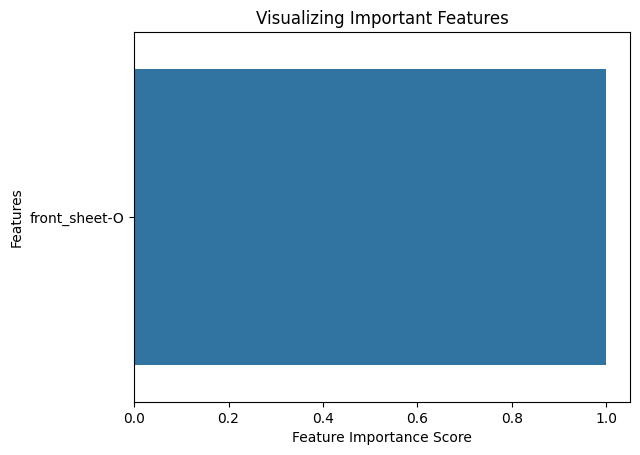

In [15]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()